In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
data = pd.read_csv('/content/drive/My Drive/NanAnalyzation/COVID19/covid_19_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 8 columns):
SNo                3395 non-null int64
ObservationDate    3395 non-null object
Province/State     2264 non-null object
Country/Region     3395 non-null object
Last Update        3395 non-null object
Confirmed          3395 non-null float64
Deaths             3395 non-null float64
Recovered          3395 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 212.3+ KB


In [50]:
# Drop Sno Collumn
data.drop(columns = ['SNo'], axis = 1, inplace = True)
# data = data[['ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']]
data.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3390,03/04/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,03/04/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,03/04/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,03/04/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3394,03/04/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


# Cases by Country / Region

In [51]:
# Total number of Confirmed, Deaths & Recovered Cases by Country / Region
dataSum = data.groupby(['Country/Region', 'Province/State']).last().sum(level = 'Country/Region').sort_values(by = 'Confirmed', ascending = False)
print(dataSum.info())
dataSum

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Mainland China to Iraq
Data columns (total 3 columns):
Confirmed    13 non-null float64
Deaths       13 non-null float64
Recovered    13 non-null float64
dtypes: float64(3)
memory usage: 416.0+ bytes
None


,Confirmed,Deaths,Recovered
Country/Region,,,
Mainland China,80271.0,2981.0,49955.0
Others,767.0,6.0,10.0
US,193.0,12.0,11.0
Hong Kong,105.0,2.0,37.0
Australia,52.0,2.0,11.0
Taiwan,42.0,1.0,12.0
Canada,36.0,0.0,6.0
Macau,10.0,0.0,9.0
Germany,5.0,0.0,0.0


                Confirmed  Deaths  Recovered
Country/Region                              
Mainland China    80271.0  2981.0    49955.0
Others             1214.0    23.0       96.0


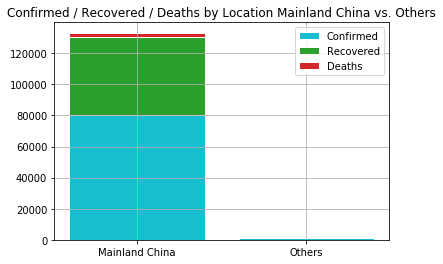

In [52]:
# Mainland China Cases versus Others

dataSumChina = dataSum.copy()
dataSumChina['Country/Region'] = dataSumChina.index
dataSumChina['Country/Region'] = dataSumChina['Country/Region'].apply(lambda x: 'Mainland China' if x == 'Mainland China' else 'Others' )
dataSumChina = dataSumChina.reset_index(drop=True).groupby('Country/Region').sum()
print(dataSumChina)

plt.title('Confirmed / Recovered / Deaths by Location Mainland China vs. Others')
plt.grid()
width = 0.8

plt.bar(x = dataSumChina.index , height = dataSumChina['Confirmed'], color ='tab:cyan', edgecolor = 'white', width = width)
plt.bar(x = dataSumChina.index , height = dataSumChina['Recovered'], bottom = dataSumChina['Confirmed'], color ='tab:green', edgecolor = 'white', width = width)
plt.bar(x = dataSumChina.index , height = dataSumChina['Deaths'], bottom = dataSumChina['Recovered'] + dataSumChina['Confirmed'], color ='tab:red', edgecolor = 'white', width = width)

plt.legend(dataSumChina[['Confirmed', 'Recovered', 'Deaths']], loc = 0)
plt.show()


                Confirmed  Deaths  Recovered
Country/Region                              
Others              767.0     6.0       10.0
US                  193.0    12.0       11.0
Hong Kong           105.0     2.0       37.0
Australia            52.0     2.0       11.0
Taiwan               42.0     1.0       12.0
Canada               36.0     0.0        6.0
Macau                10.0     0.0        9.0
Germany               5.0     0.0        0.0
Austria               2.0     0.0        0.0
Israel                1.0     0.0        0.0
Lebanon               1.0     0.0        0.0
Iraq                  0.0     0.0        0.0


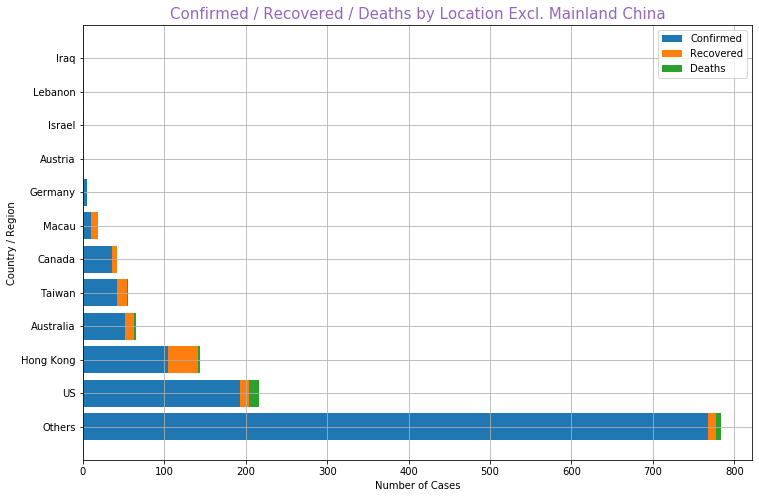

In [53]:
# Excluding Mainland China 

dataSumOthers = dataSum.copy()
dataSumOthers['Country/Region'] = dataSumOthers.index
dataSumOthers = dataSumOthers.iloc[1:]

dataSumOthers = dataSumOthers.reset_index (drop = True).groupby('Country/Region').sum().sort_values(by = 'Confirmed', ascending = False)
print(dataSumOthers)

plt.figure (figsize = (12,8))
plt.grid()
plt.title('Confirmed / Recovered / Deaths by Location Excl. Mainland China', fontsize = 15, color = 'tab:purple')
plt.xlabel('Number of Cases')
plt.ylabel('Country / Region')

plt.barh (y = dataSumOthers.index , width = dataSumOthers['Confirmed'])
plt.barh (y = dataSumOthers.index , width = dataSumOthers['Recovered'], left = dataSumOthers['Confirmed'])
plt.barh (y = dataSumOthers.index , width = dataSumOthers['Deaths'], left = dataSumOthers['Recovered'] + dataSumOthers['Confirmed'])

plt.legend(dataSumOthers[['Confirmed', 'Recovered', 'Deaths']], loc = 0)

# Cases over Time

In [54]:
# Cleaning Last Update Column

example1 = '1/22/2020 17:00'
example2 = '2020-02-02T23:43:02'
example3 = '1/23/20 17:00'

def convertDatetime(x):

  if '/' in x and len(x.split(' ')[0].split('/')[2]) > 2:
    month = x.split(' ')[0].split('/')[0]
    date = x.split(' ')[0].split('/')[1]
    year = x.split(' ')[0].split('/')[2]

  elif '/' in x and len(x.split(' ')[0].split('/')[2]) == 2:
    month = x.split(' ')[0].split('/')[0]
    date = x.split(' ')[0].split('/')[1]
    year = x.split(' ')[0].split('/')[2] + '20'

  else: 
    year = x.split('T')[0].split('-')[0]
    month = x.split('T')[0].split('-')[1]
    date = x.split('T')[0].split('-')[2]


  dateTime = date + '/'+ month + '/' + year

  return dateTime

print(convertDatetime(example1))
print(convertDatetime(example2))
print(convertDatetime(example3))

22/1/2020
02/02/2020
23/1/2020


In [0]:
# Function to Standardize Last Update 
def convertDatetime(x):

  if '/' in x and len(x.split(' ')[0].split('/')[2]) > 2:
    month = x.split(' ')[0].split('/')[0]
    date = x.split(' ')[0].split('/')[1]
    year = x.split(' ')[0].split('/')[2]

  elif '/' in x and len(x.split(' ')[0].split('/')[2]) == 2:
    month = x.split(' ')[0].split('/')[0]
    date = x.split(' ')[0].split('/')[1]
    year = x.split(' ')[0].split('/')[2] + '20'

  else: 
    year = x.split('T')[0].split('-')[0]
    month = x.split('T')[0].split('-')[1]
    date = x.split('T')[0].split('-')[2]


  dateTime = date + '/'+ month + '/' + year

  return dateTime

In [68]:
# Converting Last Update & ObservationDate columns to Datetime Format 

data['LastUpdateDatetime'] = data['Last Update'].apply(convertDatetime)
data['LastUpdateDatetime'] = pd.to_datetime(data['LastUpdateDatetime'], infer_datetime_format = True)
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], format = '%m/%d/%Y')
print(data.info())
data.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 8 columns):
ObservationDate       3395 non-null datetime64[ns]
Province/State        2264 non-null object
Country/Region        3395 non-null object
Last Update           3395 non-null object
Confirmed             3395 non-null float64
Deaths                3395 non-null float64
Recovered             3395 non-null float64
LastUpdateDatetime    3395 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 212.3+ KB
None


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,LastUpdateDatetime
154,2020-01-25,Taiwan,Taiwan,1/25/20 17:00,3.0,0.0,0.0,2020-01-25


In [69]:
# Drop Last Update and use LastUpdateDatetime 

#data.drop(columns = 'Last Update', axis = 1, inplace = True)

casesOvertime = data.groupby(['LastUpdateDatetime']).sum()

# Current Cases = Confirmed - Recovered - Deaths 

casesOvertime['Current'] = casesOvertime['Confirmed'] - casesOvertime['Deaths'] - casesOvertime['Recovered']
print(casesOvertime.info())

casesOvertime[:20]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2020-01-22 to 2020-03-04
Data columns (total 4 columns):
Confirmed    43 non-null float64
Deaths       43 non-null float64
Recovered    43 non-null float64
Current      43 non-null float64
dtypes: float64(4)
memory usage: 1.7 KB
None


,Confirmed,Deaths,Recovered,Current
LastUpdateDatetime,,,,
2020-01-22,555.0,17.0,28.0,510.0
2020-01-23,653.0,18.0,30.0,605.0
2020-01-24,941.0,26.0,36.0,879.0
2020-01-25,1438.0,42.0,39.0,1357.0
2020-01-26,2118.0,56.0,52.0,2010.0
2020-01-27,2927.0,82.0,61.0,2784.0
2020-01-28,5578.0,131.0,107.0,5340.0
2020-01-29,6165.0,133.0,126.0,5906.0
2020-01-30,8235.0,171.0,143.0,7921.0


Text(0.5, 0, 'Number of Cases')

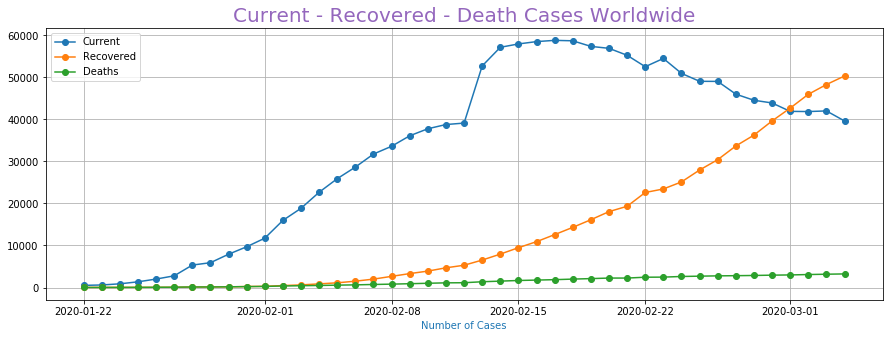

In [83]:
# Current - Recovered - Deaths over Time 

plt.figure (figsize = (15, 5))
plt.grid()

dates = casesOvertime.index
casesCurrent = casesOvertime['Current']
casesRecovered = casesOvertime['Recovered']
casesDeaths = casesOvertime['Deaths']

plt.plot_date(dates, casesCurrent, fmt = 'o-', xdate = True, ydate = False, label = 'Current')
plt.plot_date(dates, casesRecovered, fmt = 'o-', xdate = True, ydate = False, label = 'Recovered')
plt.plot_date(dates, casesDeaths, fmt = 'o-', xdate = True, ydate = False, label = 'Deaths')

plt.legend(loc = 0)

plt.title('Current - Recovered - Death Cases Worldwide', fontsize = 20, color = 'tab:purple')
plt.xlabel('Date', color = 'tab:blue')
plt.xlabel('Number of Cases', color = 'tab:blue')

# Vietnam

In [0]:
vietnam = data[data['Country/Region'] == 'Vietnam']

In [72]:
example0 = '2020-02-10T03:03:09'

print(convertDatetime(example0))
pd.to_datetime(convertDatetime(example0), infer_datetime_format = True)

10/02/2020


Timestamp('2020-10-02 00:00:00')

In [73]:
print(vietnam.info())
vietnam[:20]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 79 to 3296
Data columns (total 8 columns):
ObservationDate       42 non-null datetime64[ns]
Province/State        0 non-null object
Country/Region        42 non-null object
Last Update           42 non-null object
Confirmed             42 non-null float64
Deaths                42 non-null float64
Recovered             42 non-null float64
LastUpdateDatetime    42 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 3.0+ KB
None


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,LastUpdateDatetime
79,2020-01-23,NaN,Vietnam,1/23/20 17:00,2.0,0.0,0.0,2020-01-23
123,2020-01-24,NaN,Vietnam,1/24/20 17:00,2.0,0.0,0.0,2020-01-24
164,2020-01-25,NaN,Vietnam,1/25/20 17:00,2.0,0.0,0.0,2020-01-25
210,2020-01-26,NaN,Vietnam,1/26/20 16:00,2.0,0.0,0.0,2020-01-26
257,2020-01-27,NaN,Vietnam,1/27/20 23:59,2.0,0.0,0.0,2020-01-27
308,2020-01-28,NaN,Vietnam,1/28/20 23:00,2.0,0.0,0.0,2020-01-28
360,2020-01-29,NaN,Vietnam,1/29/20 19:30,2.0,0.0,0.0,2020-01-29
415,2020-01-30,NaN,Vietnam,1/30/20 16:00,2.0,0.0,0.0,2020-01-30
477,2020-01-31,NaN,Vietnam,1/31/2020 23:59,2.0,0.0,0.0,2020-01-31
533,2020-02-01,NaN,Vietnam,2/1/2020 7:38,6.0,0.0,1.0,2020-02-01


In [74]:
# Last Updated 4th March 2020, Vietnam has 16 Reported Cases & according to this data, no recovery and no death. 
vietnam.groupby('Country/Region').last().sum()

ObservationDate       2020-03-04 00:00:00
Province/State                          0
Last Update           2020-02-25T08:53:02
Confirmed                              16
Deaths                                  0
Recovered                              16
LastUpdateDatetime    2020-02-25 00:00:00
dtype: object

In [75]:
vietnam.drop_duplicates(subset = 'LastUpdateDatetime', keep = 'last', inplace = True)
print(vietnam.info())
vietnam

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 79 to 3296
Data columns (total 8 columns):
ObservationDate       18 non-null datetime64[ns]
Province/State        0 non-null object
Country/Region        18 non-null object
Last Update           18 non-null object
Confirmed             18 non-null float64
Deaths                18 non-null float64
Recovered             18 non-null float64
LastUpdateDatetime    18 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 1.3+ KB
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,LastUpdateDatetime
79,2020-01-23,NaN,Vietnam,1/23/20 17:00,2.0,0.0,0.0,2020-01-23
123,2020-01-24,NaN,Vietnam,1/24/20 17:00,2.0,0.0,0.0,2020-01-24
164,2020-01-25,NaN,Vietnam,1/25/20 17:00,2.0,0.0,0.0,2020-01-25
210,2020-01-26,NaN,Vietnam,1/26/20 16:00,2.0,0.0,0.0,2020-01-26
257,2020-01-27,NaN,Vietnam,1/27/20 23:59,2.0,0.0,0.0,2020-01-27
308,2020-01-28,NaN,Vietnam,1/28/20 23:00,2.0,0.0,0.0,2020-01-28
360,2020-01-29,NaN,Vietnam,1/29/20 19:30,2.0,0.0,0.0,2020-01-29
415,2020-01-30,NaN,Vietnam,1/30/20 16:00,2.0,0.0,0.0,2020-01-30
477,2020-01-31,NaN,Vietnam,1/31/2020 23:59,2.0,0.0,0.0,2020-01-31
600,2020-02-02,NaN,Vietnam,2020-02-01T07:38:12,6.0,0.0,1.0,2020-02-01


Text(0, 0.5, 'Number of Cases')

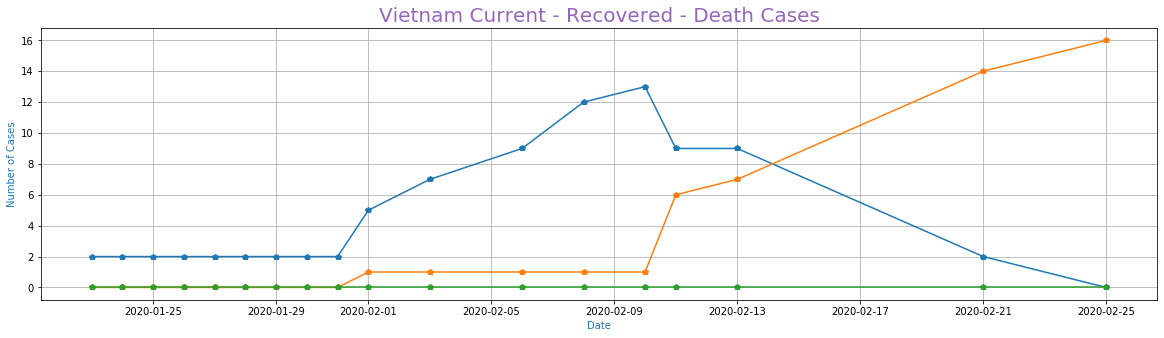

In [79]:
plt.figure(figsize = (20,5))
plt.grid()
plt.plot_date(x = vietnam['LastUpdateDatetime'], y = vietnam['Confirmed'] - vietnam['Recovered'] - vietnam['Deaths'], fmt = '-p', xdate = True, ydate = False)
plt.plot_date(x = vietnam['LastUpdateDatetime'], y = vietnam['Recovered'], fmt = '-p', xdate = True, ydate = False)
plt.plot_date(x = vietnam['LastUpdateDatetime'], y = vietnam['Deaths'], fmt = '-p', xdate = True, ydate = False)

plt.title('Vietnam Current - Recovered - Death Cases', fontsize = 20, color = 'tab:purple')
plt.xlabel('Date', color = 'tab:blue')
plt.ylabel('Number of Cases', color = 'tab:blue')